## 数据获取

getWeatherData:通过爬虫获取天气数据
mergeData:将天气数据与下载好的航线数据合并

## 数据预处理

In [11]:
import pandas as pd

data = pd.read_excel("merged_data.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,最高温度,最低温度,AQI,风向,降水量,天气
0,Jet Airways,06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,41℃,33℃,0,西风3级,0.11,晴雨
1,Multiple carriers,05-27,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,37℃,24℃,0,东南风3级,0.00,雨
2,Air India,06-01,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907,37℃,26℃,0,西北风3级,3.07,晴雨
3,Air India,03-03,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011,33℃,20℃,0,西风2级,0.00,多云晴
4,SpiceJet,04-15,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No info,5830,39℃,29℃,0,西风1级,0.00,晴
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4532,Air India,06-15,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,9929,40℃,32℃,0,西北风3级,0.00,多云
4533,Jet Airways,06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150,39℃,29℃,0,东风2级,4.83,多云雨
4534,Jet Airways,05-27,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704,37℃,24℃,0,东南风3级,0.00,雨
4535,Multiple carriers,05-01,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794,26℃,21℃,0,东风3级,0.20,雨阴


In [12]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', '最高温度', '最低温度', 'AQI', '风向', '降水量', '天气'],
      dtype='object')

## 探索性数据分析

In [18]:
import matplotlib.pyplot as plt
from pylab import mpl
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决中文显示为方块的问题

7804.175
10000.068273092369
6587.1578947368425
7203.933333333333
12642.593316519546
49387.5
10902.678093645485
11418.846153846154
5916.35632183908
6465.644444444444
Air Asia
Air India
GoAir
IndiGo
Jet Airways
Jet Airways Business
Multiple carriers
Multiple carriers Premium economy
SpiceJet
Vistara


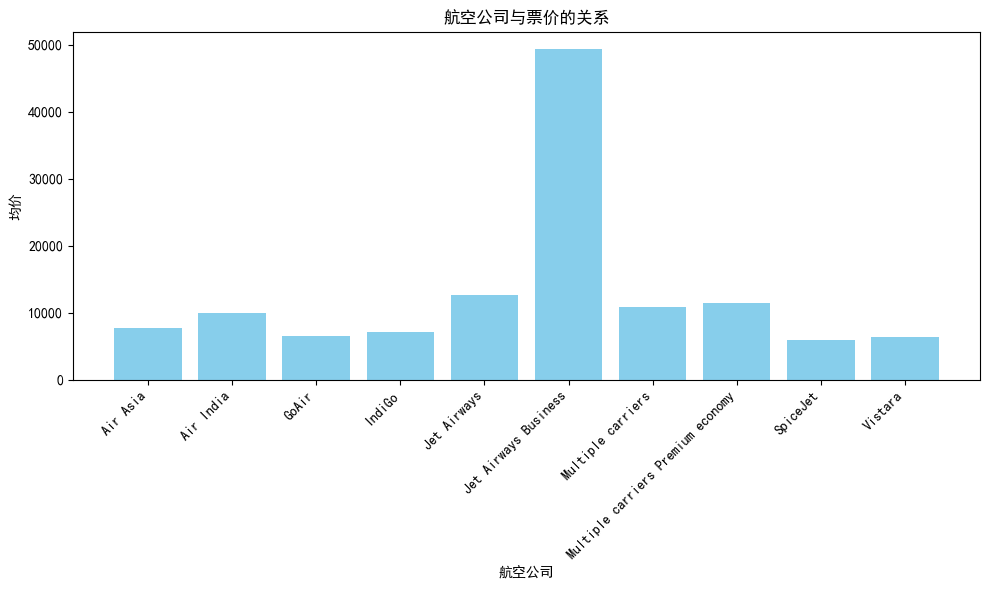

In [75]:
avg_prices = data.groupby('Airline')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_prices['Airline'], avg_prices['Price'], color='skyblue')
plt.xlabel('航空公司')
plt.ylabel('均价')
plt.title('航空公司与票价的关系')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, price in enumerate(avg_prices['Price']):
    print(price)
for i, Airline in enumerate(avg_prices['Airline']):
    print(Airline) 
    
plt.show()

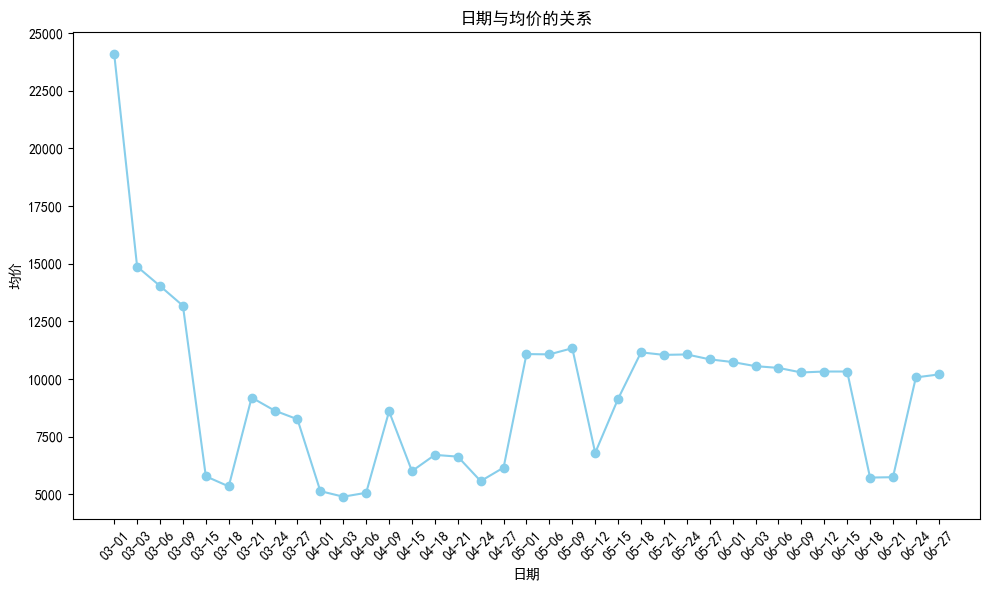

In [30]:
avg_prices = data.groupby('Date_of_Journey')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_prices['Date_of_Journey'], avg_prices['Price'], marker='o', color='skyblue')
plt.xlabel('日期')
plt.ylabel('均价')
plt.title('日期与均价的关系')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

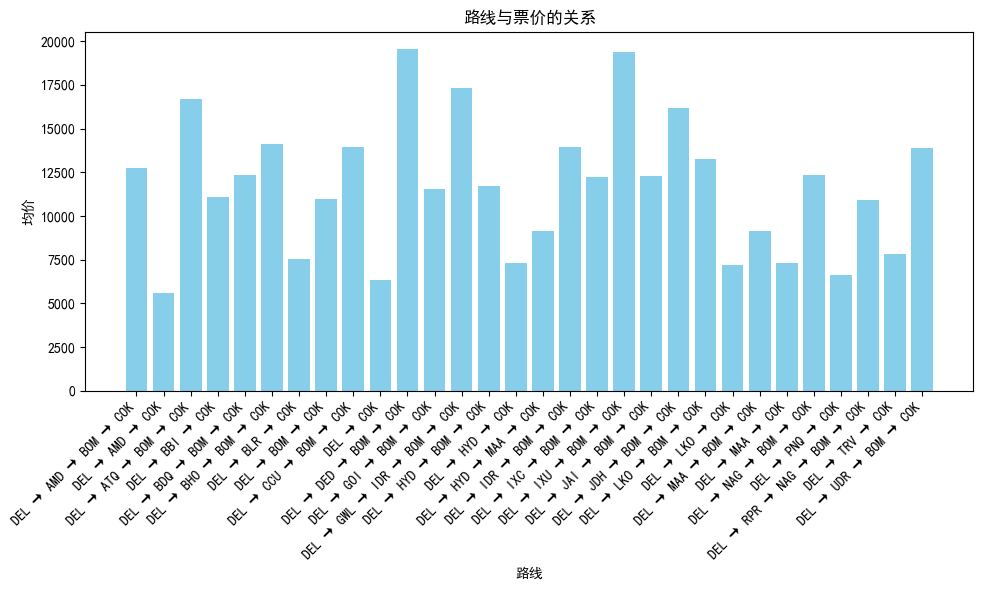

In [44]:
avg_prices = data.groupby('Route')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_prices['Route'], avg_prices['Price'], color='skyblue')
plt.xlabel('路线')
plt.ylabel('均价')
plt.title('路线与票价的关系')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

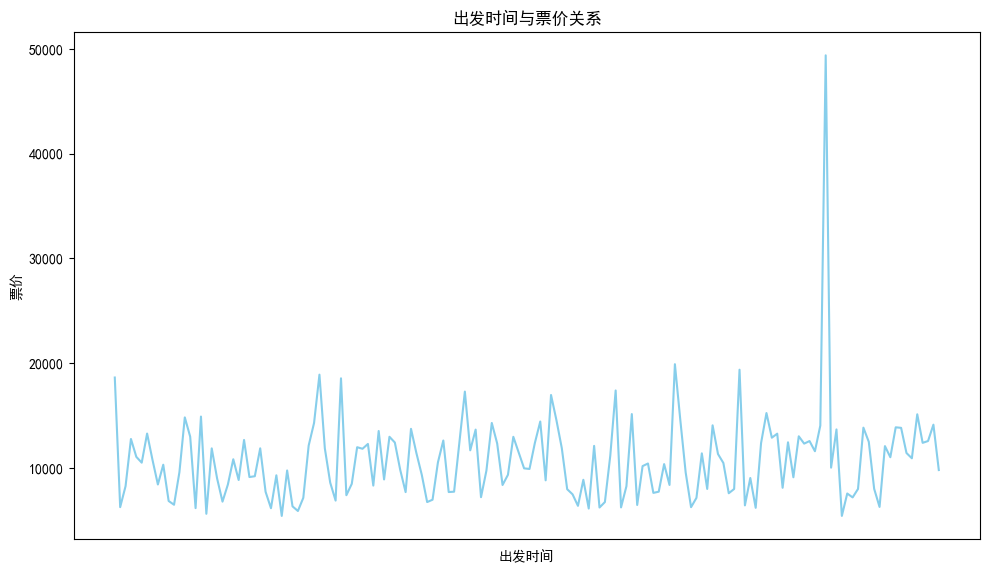

In [45]:
avg_prices = data.groupby('Dep_Time')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_prices['Dep_Time'], avg_prices['Price'], color='skyblue')
plt.xlabel('出发时间')
plt.ylabel('票价')
plt.title('出发时间与票价关系')
plt.tight_layout()
plt.xticks([])  # 清空 x 轴标注
plt.show()

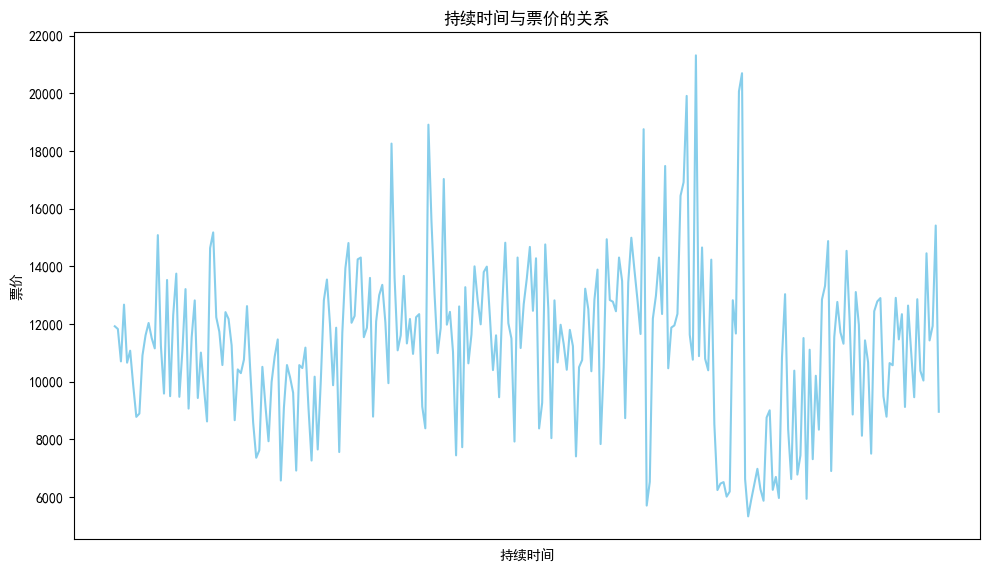

In [46]:
avg_prices = data.groupby('Duration')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_prices['Duration'], avg_prices['Price'], color='skyblue')
plt.xlabel('持续时间')
plt.ylabel('票价')
plt.title('持续时间与票价的关系')
plt.tight_layout()
plt.xticks([])  # 清空 x 轴标注
plt.show()

1 Long layover
In-flight meal not included
No check-in baggage included
No info


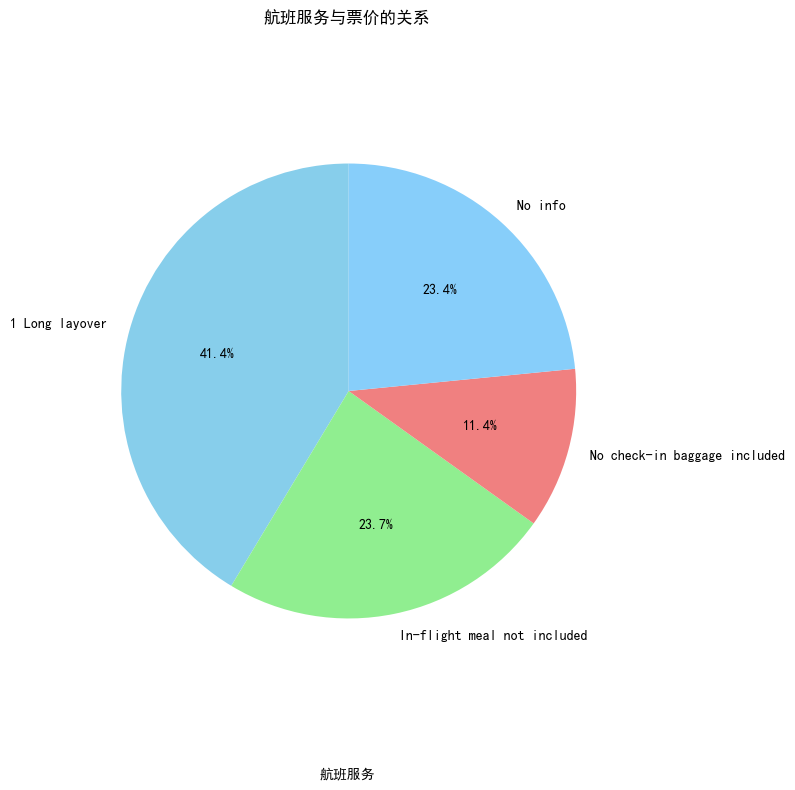

In [76]:
avg_prices = data.groupby('Additional_Info')['Price'].mean().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(avg_prices['Price'], labels=avg_prices['Additional_Info'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.axis('equal')  # 使饼图比例相等，即正圆形
plt.xlabel('航班服务')
plt.title('航班服务与票价的关系')
plt.tight_layout()

for i, Airline in enumerate(avg_prices['Additional_Info']):
    print(Airline) 
    
plt.show()

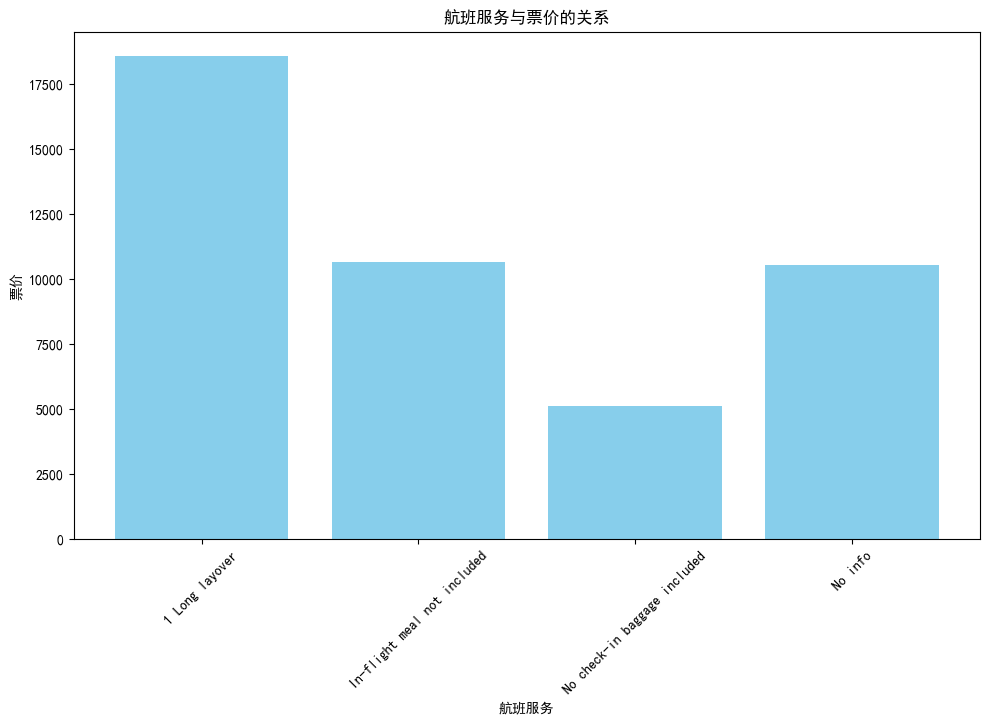

In [71]:
avg_prices = data.groupby('Additional_Info')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_prices['Additional_Info'], avg_prices['Price'], color='skyblue')
plt.xlabel('航班服务')
plt.ylabel('票价')
plt.title('航班服务与票价的关系')
plt.tight_layout()
plt.xticks(rotation=45)  # 清空 x 轴标注
plt.show()

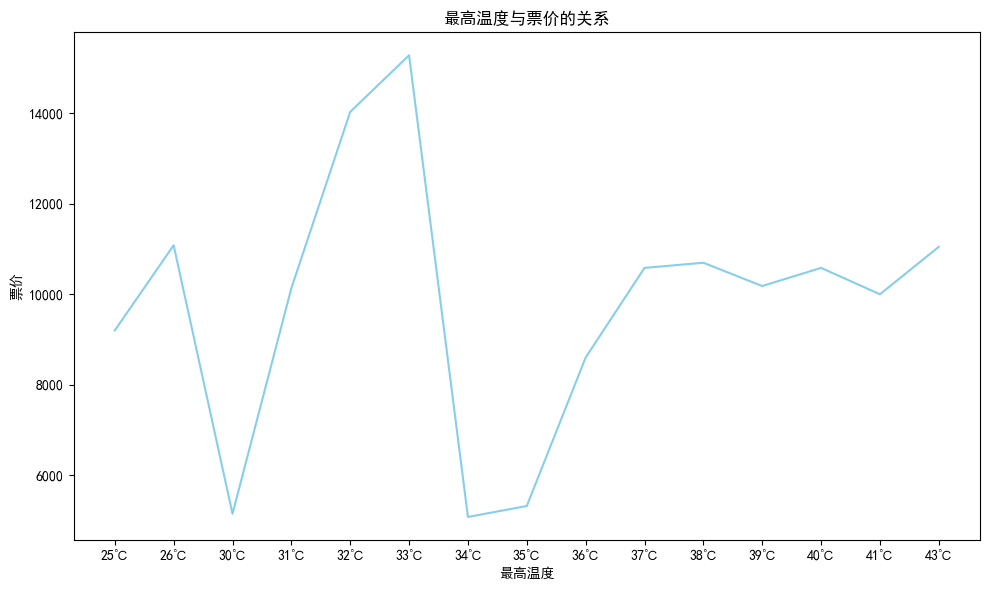

In [61]:
avg_prices = data.groupby('最高温度')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_prices['最高温度'], avg_prices['Price'], color='skyblue')
plt.xlabel('最高温度')
plt.ylabel('票价')
plt.title('最高温度与票价的关系')
plt.tight_layout()
# plt.xticks([])  # 清空 x 轴标注
plt.show()

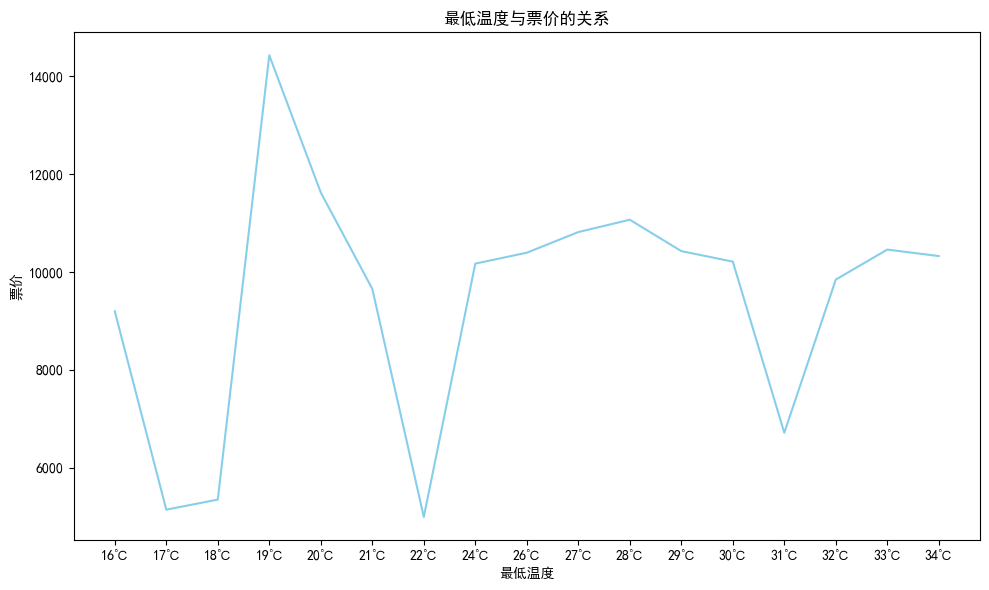

In [62]:
avg_prices = data.groupby('最低温度')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_prices['最低温度'], avg_prices['Price'], color='skyblue')
plt.xlabel('最低温度')
plt.ylabel('票价')
plt.title('最低温度与票价的关系')
plt.tight_layout()
# plt.xticks([])  # 清空 x 轴标注
plt.show()

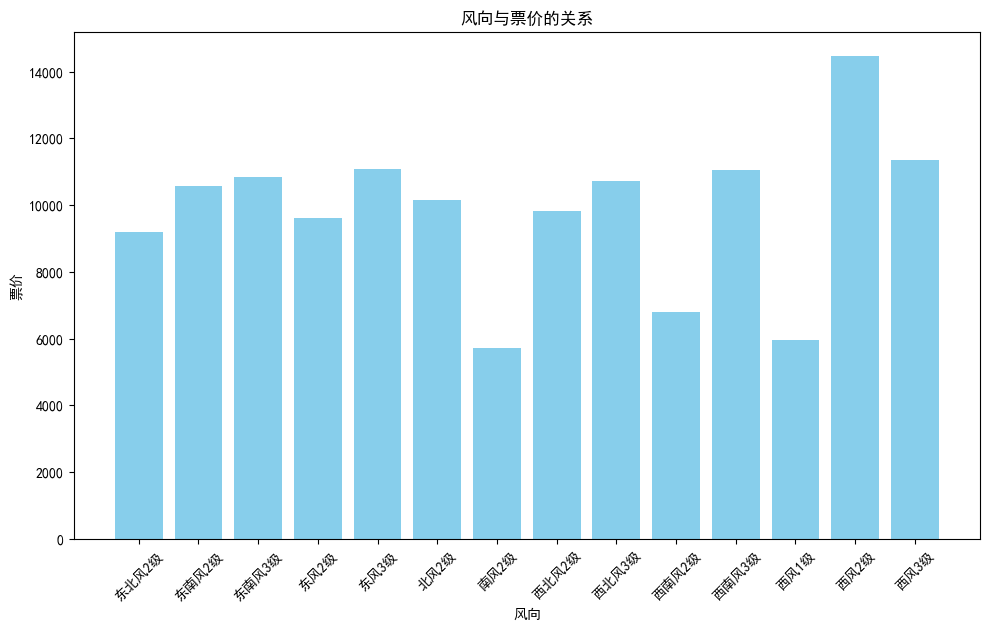

In [65]:
avg_prices = data.groupby('风向')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_prices['风向'], avg_prices['Price'], color='skyblue')
plt.xlabel('风向')
plt.ylabel('票价')
plt.title('风向与票价的关系')
plt.tight_layout()
plt.xticks(rotation=45)  # 清空 x 轴标注
plt.show()

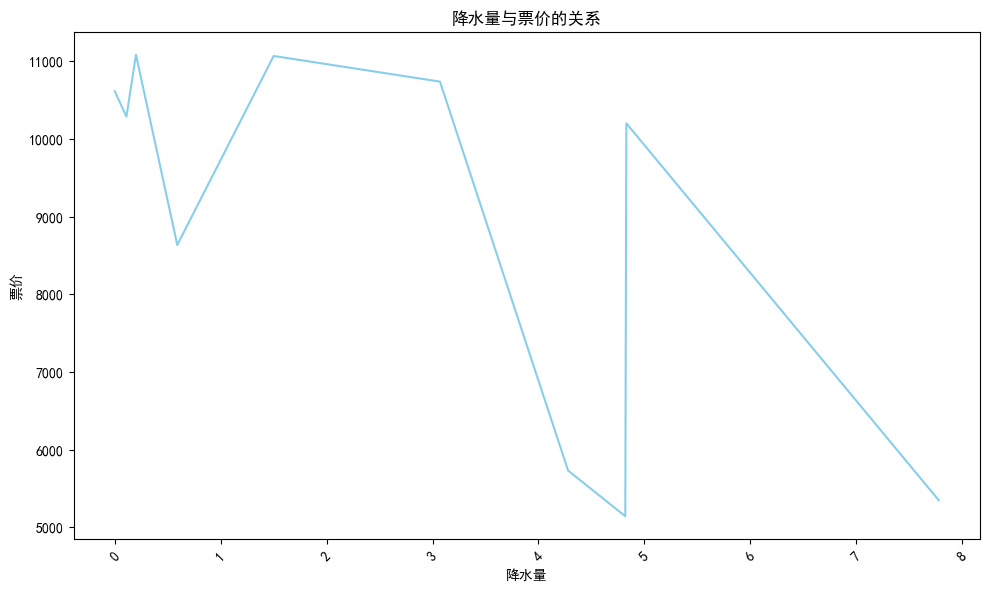

In [67]:
avg_prices = data.groupby('降水量')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_prices['降水量'], avg_prices['Price'], color='skyblue')
plt.xlabel('降水量')
plt.ylabel('票价')
plt.title('降水量与票价的关系')
plt.tight_layout()
plt.xticks(rotation=45)  # 清空 x 轴标注
plt.show()

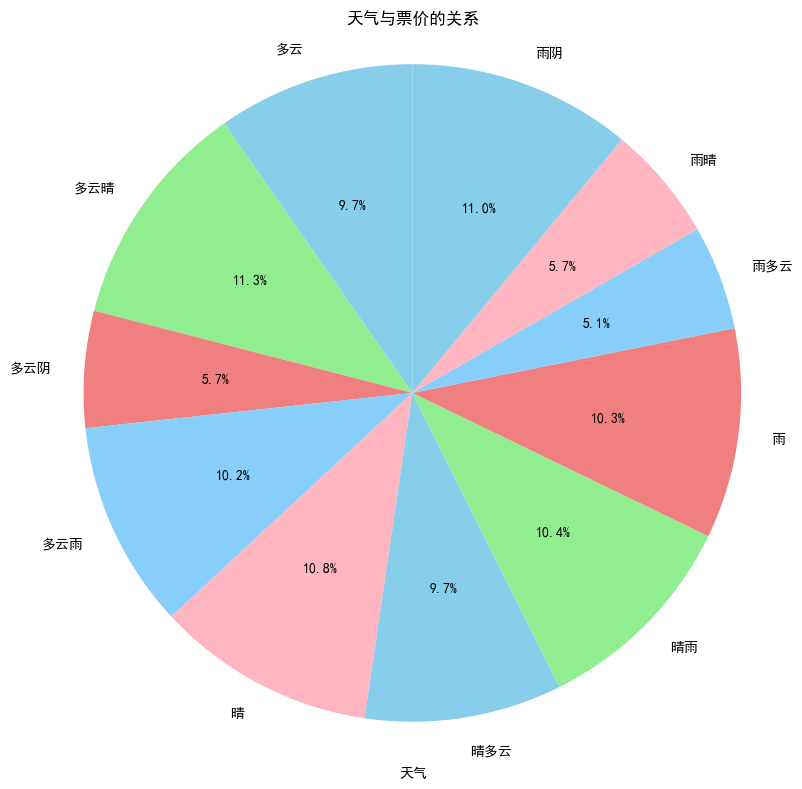

In [69]:
avg_prices = data.groupby('天气')['Price'].mean().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(avg_prices['Price'], labels=avg_prices['天气'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.axis('equal')  # 使饼图比例相等，即正圆形
plt.xlabel('天气')
plt.title('天气与票价的关系')
plt.tight_layout()
plt.show()

9779.902985074626
11356.283100107643
5785.5
10271.721428571429
10857.237012987012
9784.915549597856
10518.621276595744
10409.500910746812
5183.933333333333
5747.1
11083.470588235294
多云
多云晴
多云阴
多云雨
晴
晴多云
晴雨
雨
雨多云
雨晴
雨阴


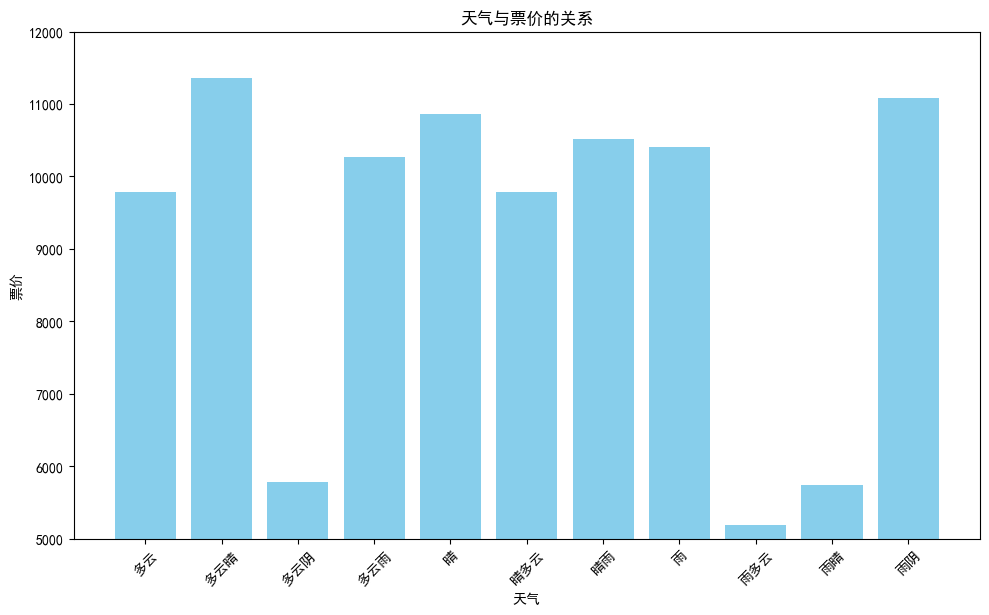

In [79]:
avg_prices = data.groupby('天气')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_prices['天气'], avg_prices['Price'], color='skyblue')
plt.xlabel('天气')
plt.ylabel('票价')
plt.title('天气与票价的关系')
plt.ylim(5000, 12000)  # 设置纵坐标范围为 0 到 2000
plt.tight_layout()
plt.xticks(rotation=45)  # 清空 x 轴标注

for i, Airline in enumerate(avg_prices['Price']):
    print(Airline) 
for i, Airline in enumerate(avg_prices['天气']):
    print(Airline) 
    
plt.show()

In [84]:
from scipy.stats import pearsonr, spearmanr

data = pd.read_csv("numeric_data.csv")

# 提取价格和其他变量的数据
price = data['Price']
other_variables = data.drop(columns=['Price'])

# 计算皮尔逊相关系数和斯皮尔曼相关系数
pearson_corr = {}
spearman_corr = {}

for col in other_variables.columns:
    pearson_corr[col] = pearsonr(data[col], price)[0]
    spearman_corr[col] = spearmanr(data[col], price)[0]

# 打印结果
print("Pearson 相关系数:")
for col, corr in pearson_corr.items():
    print(f"{col}: {corr}")

print("\nSpearman 相关系数:")
for col, corr in spearman_corr.items():
    print(f"{col}: {corr}")

Pearson 相关系数:
Airline: 0.10706232047595238
Date_of_Journey: -0.11887955510831048
Source: nan
Destination: nan
Route: -0.08062101610312038
Dep_Time: 0.1183203396932925
Arrival_Time: -0.11412873883194156
Duration: -0.09722865757333872
Total_Stops: -0.010239202248734296
Additional_Info: -0.012045596454208711
最高温度: -0.037560533019932785
最低温度: -0.06434854055180862
AQI: nan
风向: 0.1406577132331052
降水量: -0.05571892482166342
天气: -0.07854183950505131

Spearman 相关系数:
Airline: 0.1907442704225672
Date_of_Journey: -0.0770130835137839
Source: nan
Destination: nan
Route: -0.09787605546165695
Dep_Time: 0.11625763547281855
Arrival_Time: -0.10429311733003624
Duration: -0.0987416934913739
Total_Stops: 0.16117754787703584
Additional_Info: -0.03078827440206095
最高温度: -0.007951213129717615
最低温度: -0.03909863071447191
AQI: nan
风向: 0.14803283876592255
降水量: -0.03529018950182
天气: -0.0674808529923683


In [1]:
a = 3
b = a
a = 4
b

3